# Scalt - Notebook criado para fazer um estudo sobre possíveis transferências no modo carreira e que podem se espelhar na vida real também 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'slategrey', 'salmon', 'olive', 'violet', 'crimnson', 'marron', 'gold']

df = pd.read_csv("planilhas/dados/base_jogadores.csv", sep=";", index_col=0)

C:\Users\l5\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Valor euro 40% > do que a taxa de transferência (overall > 70 & idade < 27)

In [112]:
temp = df.loc[(df.valor_euro > (df.passe_euro - df.passe_euro*0.40)) & (df.emprestimo == False) & (df.idade < 27) & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head()

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
796,R. Gravenberch,19,78,90,12,33000000,52800000,Ajax
1122,N. Madueke,19,77,88,11,23000000,36800000,PSV
571,Antony,21,79,88,9,39500000,63200000,Ajax
1007,M. Kudus,20,77,86,9,23000000,36800000,Ajax
2553,D. Rensch,18,73,85,12,7000000,11200000,Ajax


In [113]:
temp.to_csv('planilhas/analises/bons_negocios.csv', columns=header, sep=';', encoding='utf-8-sig')

### Clubes para ficar de olho

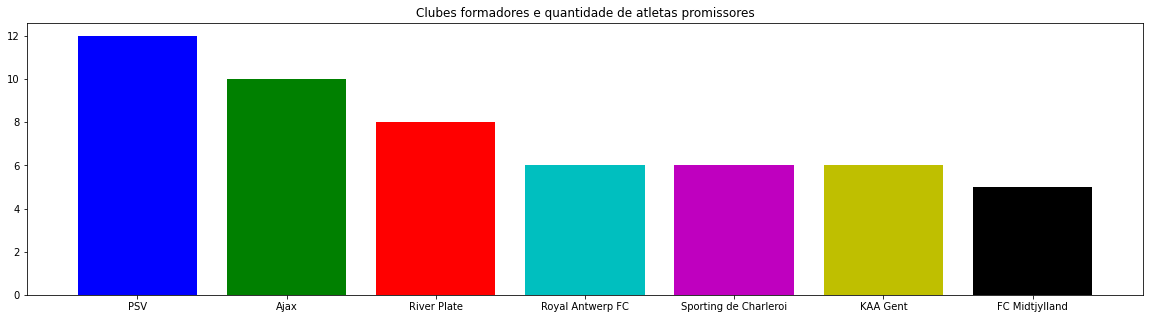

In [69]:
plt.rcParams['figure.figsize'] = [20, 5]
times = temp.clube.value_counts().index.tolist()
quantidade = temp.clube.value_counts().values.tolist()

plt.title('Clubes formadores e quantidade de atletas promissores')
plt.bar(times[:7], quantidade[:7], color=colors[:7])
plt.show()

### Jogadores >= 28 anos que podem render com potencial

In [13]:
temp = df.loc[(df.idade >= 28) & (df.overall >= 40)]
temp = temp.sort_values(by="crescimento", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head()

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
7565,H. Verhulst,28,67,70,3,950000,1500000,AZ Alkmaar
5290,S. McDermott,28,70,73,3,1500000,2000000,Kristiansund BK
16045,I. Al Kaabi,28,59,62,3,0,0,Free agent
10065,D. Petković,28,65,68,3,650000,1300000,Angers SCO
16919,J. Gal,28,58,61,3,190000,252000,Degerfors IF


### Melhores opções Free Agent com taxa de crescimento

In [51]:
temp = df.loc[(df.clube == 'Free agent') & (df.idade < 27) & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'clube']].head()

,nome,idade,overall,potencial,crescimento,clube
3612,M. Safonov,22,72,82,10,Free agent
4203,S. Szymański,22,71,81,10,Free agent
3281,D. Fomin,24,72,77,5,Free agent
2147,V. Karavaev,26,74,75,1,Free agent


### Melhores opções Free Agent

In [53]:
temp = df.loc[(df.clube == 'Free agent') & (df.overall > 70)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,clube
195,T. Alderweireld,32,83,83,0,Free agent
3612,M. Safonov,22,72,82,10,Free agent
4203,S. Szymański,22,71,81,10,Free agent
406,G. Krychowiak,31,80,80,0,Free agent
896,M. Ozdoev,28,77,78,1,Free agent
738,A. Dzyuba,32,78,78,0,Free agent
3281,D. Fomin,24,72,77,5,Free agent
1223,V. Claesson,29,76,76,0,Free agent
2733,M. Degenek,27,73,76,3,Free agent
1459,A. Dragović,30,76,76,0,Free agent


### Bons jogadores em fim de contrato (idade > 23) -> Regra dos 6 meses

In [84]:
temp = df.loc[(df.fim_contrato == 2022) & (df.idade >= 23) & (df.idade <= 30)]
temp = temp.sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'salario_euro', 'clube']].head(20)

,nome,idade,overall,potencial,salario_euro,clube
167,F. Chiesa,23,83,91,74000,Juventus
42,P. Dybala,27,87,88,160000,Juventus
170,O. Dembélé,24,83,88,165000,FC Barcelona
41,P. Pogba,28,87,87,220000,Manchester United
211,N. Süle,25,82,87,78000,FC Bayern München
205,P. Gollini,26,82,87,48000,Tottenham Hotspur
204,C. Romero,23,82,87,51000,Tottenham Hotspur
477,D. Zakaria,24,80,86,28000,Borussia Mönchengladbach
1006,L. Suárez,23,77,86,23000,Granada CF
384,L. Pellegrini,25,81,86,61000,Roma


In [87]:
temp = df.loc[(df.emprestimo == False) & (df.idade < 23) & (df.overall > 70) & (df.fim_contrato == 2022)]
temp = temp.sort_values(by="potencial", ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'salario_euro', 'clube']].head(20)

,nome,idade,overall,potencial,salario_euro,clube
2,K. Mbappé,22,91,95,230000,Paris Saint-Germain
292,Pedri,18,81,91,51000,FC Barcelona
1292,Ansu Fati,18,76,90,44000,FC Barcelona
2290,G. Raspadori,21,74,88,22000,Sassuolo
1301,A. Hložek,18,76,87,500,Sparta Praha
400,B. Kamara,21,80,86,30000,Olympique de Marseille
2662,Diogo Costa,21,73,85,5000,FC Porto
3541,Fábio Vieira,21,72,85,7000,FC Porto
855,D. Zagadou,22,78,84,42000,Borussia Dortmund
1340,R. Alvarado,22,76,83,48000,Cruz Azul


### Potenciais goleiros de sucesso

In [105]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & (df.posicao_preferida == 'GK') & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
20,G. Donnarumma,22,89,93,4,119500000,230000000,Paris Saint-Germain
106,M. Maignan,25,84,89,5,49500000,87900000,Milan
205,P. Gollini,26,82,87,5,35000000,0,Tottenham Hotspur
260,D. Livaković,26,82,87,5,35000000,79600000,Dinamo Zagreb
403,D. Henderson,24,80,87,7,36000000,73800000,Manchester United
4069,M. Vandevoordt,19,71,87,16,4300000,9100000,KRC Genk
207,Unai Simón,24,82,86,4,34500000,75000000,Athletic Club de Bilbao
563,A. Meret,24,79,86,7,30000000,57000000,Napoli
3260,L. Morales,21,72,85,13,5000000,10600000,Club Atlético Lanús
2662,Diogo Costa,21,73,85,12,6500000,14300000,FC Porto


In [106]:
temp.to_csv('planilhas/analises/goleiros_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais laterais/alas esquerdos

In [121]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & ((df.posicao_preferida == 'LB') | (df.posicao_preferida == 'LWB')) & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
116,T. Hernández,23,84,90,6,62500000,118800000,Milan
213,A. Davies,20,82,89,7,57000000,105500000,FC Bayern München
789,Nuno Mendes,19,78,88,10,29000000,0,Paris Saint-Germain
300,Renan Lodi,23,81,86,5,36500000,77600000,Atlético Madrid
461,K. Tierney,24,80,86,6,31000000,65099999,Arsenal
212,B. Chilwell,24,82,86,4,40500000,78000000,Chelsea
493,O. Zinchenko,24,80,85,5,29500000,56800000,Manchester City
517,P. Estupiñán,23,79,85,6,26000000,59800000,Villarreal CF
1372,Miranda,21,76,84,8,16000000,36800000,Real Betis
1374,M. Olivera,23,76,84,8,16000000,36800000,Getafe CF


In [122]:
temp.to_csv('planilhas/analises/laterais-alas_esquerdos_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais zagueiros

In [115]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & (df.posicao_preferida == 'CB') & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
30,Rúben Dias,24,87,91,4,102500000,197300000,Manchester City
217,D. Upamecano,22,82,90,8,64000000,118400000,FC Bayern München
94,M. de Ligt,21,85,90,5,75000000,129400000,Juventus
165,J. Koundé,22,83,89,6,53000000,121900000,Sevilla FC
261,Pau Torres,24,82,89,7,56500000,130000000,Villarreal CF
263,Éder Militão,23,82,89,7,56500000,127100000,Real Madrid
398,A. Bastoni,22,80,89,9,44500000,84600000,Inter
109,J. Giménez,26,84,88,4,52000000,110500000,Atlético Madrid
221,J. Gomez,24,82,88,6,43500000,89200000,Liverpool
298,E. Tapsoba,22,81,88,7,48500000,92200000,Bayer 04 Leverkusen


In [116]:
temp.to_csv('planilhas/analises/zagueiros_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais laterias direitos

In [119]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & ((df.posicao_preferida == 'RB') | (df.posicao_preferida == 'RWB')) & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
32,T. Alexander-Arnold,22,87,92,5,114000000,219500000,Liverpool
404,Pedro Porro,21,80,87,7,40500000,0,Sporting CP
174,A. Wan-Bissaka,23,83,87,4,48500000,93400000,Manchester United
291,R. James,21,81,86,5,37000000,71200000,Chelsea
349,K. Laimer,24,81,85,4,33500000,59500000,RB Leipzig
402,N. Mazraoui,23,80,85,5,29500000,43500000,Ajax
2553,D. Rensch,18,73,85,12,7000000,11200000,Ajax
2299,J. Bogle,20,74,85,11,9000000,18900000,Sheffield United
1975,T. Lamptey,20,74,84,10,9000000,18900000,Brighton & Hove Albion
2844,Dodô,22,73,84,11,6500000,15000000,Shakhtar Donetsk


In [123]:
temp.to_csv('planilhas/analises/laterais-alas_direitos_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais volantes

In [124]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & (df.posicao_preferida == 'CDM') & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
200,D. Rice,22,82,87,5,43000000,84900000,West Ham United
400,B. Kamara,21,80,86,6,31000000,65099999,Olympique de Marseille
528,L. Martínez,23,79,85,6,25000000,40000000,Ajax
2900,Gustavo Assunção,21,73,85,12,7000000,0,Galatasaray SK
354,K. Phillips,25,81,85,4,32500000,64200000,Leeds United
852,B. Soumaré,22,78,85,7,27000000,56700000,Leicester City
2779,E. Fernández,20,73,84,11,6500000,10400000,River Plate
547,N. Maksimović,26,79,84,5,23000000,50000000,Getafe CF
840,Y. Herrera,23,78,84,6,22000000,0,RCD Espanyol
525,M. Arambarri,25,79,84,5,23500000,51100000,Getafe CF


In [125]:
temp.to_csv('planilhas/analises/volantes_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais meio-campitas

In [126]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & ((df.posicao_preferida == 'CM') | (df.posicao_preferida == 'LM') | (df.posicao_preferida == 'RM') | (df.posicao_preferida == 'CAM') | (df.posicao_preferida == 'LF') | (df.posicao_preferida == 'RF')) & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
34,F. de Jong,24,87,92,5,119500000,253900000,FC Barcelona
108,P. Foden,21,84,92,8,94500000,193700000,Manchester City
138,K. Havertz,22,84,92,8,94500000,193700000,Chelsea
164,João Félix,21,83,91,8,82000000,184500000,Atlético Madrid
292,Pedri,18,81,91,10,54000000,121500000,FC Barcelona
167,F. Chiesa,23,83,91,8,80500000,0,Juventus
45,J. Sancho,21,87,91,4,116500000,224300000,Manchester United
262,Ferran Torres,21,82,90,8,68500000,140400000,Manchester City
796,R. Gravenberch,19,78,90,12,33000000,52800000,Ajax
397,Vinícius Jr.,20,80,90,10,46500000,104600000,Real Madrid


In [127]:
temp.to_csv('planilhas/analises/meias_promissores.csv', sep=';', encoding='utf-8-sig')

### Potenciais Pontas

In [128]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & ((df.posicao_preferida == 'LM') | (df.posicao_preferida == 'RW')) & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
299,D. Kulusevski,21,81,89,8,58000000,107300000,Juventus
170,O. Dembélé,24,83,88,5,55000000,116900000,FC Barcelona
390,B. Saka,19,80,88,8,45500000,95600000,Arsenal
294,M. Diaby,21,81,88,7,52500000,99800000,Bayer 04 Leverkusen
290,Cucurella,22,81,87,6,41500000,87200000,Brighton & Hove Albion
202,Raphinha,24,82,87,5,46000000,90900000,Leeds United
848,I. Sarr,23,78,86,8,31000000,65099999,Watford
353,Gonçalo Guedes,24,81,86,5,39000000,84800000,Valencia CF
1004,S. Chukwueze,22,77,85,8,23500000,54100000,Villarreal CF
837,J. Harrison,24,78,84,6,22000000,46200000,Leeds United


In [129]:
temp.to_csv('planilhas/analises/pontas_promissores.csv', sep=';', encoding='utf-8-sig')

In [130]:
temp = df.loc[(df.idade < 27) & (df.overall > 70) & ((df.posicao_preferida == 'CF') | (df.posicao_preferida == 'ST')) & (df.crescimento > 3)].sort_values(by='potencial', ascending=False)
temp[['nome', 'idade', 'overall', 'potencial', 'crescimento', 'valor_euro', 'passe_euro', 'clube']].head(15)

,nome,idade,overall,potencial,crescimento,valor_euro,passe_euro,clube
2,K. Mbappé,22,91,95,4,194000000,373500000,Paris Saint-Germain
22,E. Haaland,20,88,93,5,137500000,244100000,Borussia Dortmund
91,L. Martínez,23,85,89,4,78000000,138500000,Inter
2290,G. Raspadori,21,74,88,14,10500000,24400000,Sassuolo
171,Gabriel Jesus,24,83,87,4,52500000,101100000,Manchester City
199,Richarlison,24,82,87,5,46500000,91800000,Everton
214,Diogo Jota,24,82,87,5,46000000,88600000,Liverpool
1301,A. Hložek,18,76,87,11,16000000,38400000,Sparta Praha
435,V. Osimhen,22,80,87,7,43000000,81700000,Napoli
510,M. Kean,21,79,87,8,39500000,0,Juventus
